# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 11.03.2017

In [6]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

## Глава 1 Библиотека matplotlib. Pyplot интерфейс


### Содержание главы

1. Библиотека matplotlib. Pyplot интерфейс 

2. Иерархическая структура рисунка в matplotlib

3. Интерфейс прикладного программирования matplotlib API

4. Интерфейс Pyplot

5. Элементы рисунка Artists

6. Свойства графических элементов

**Библиотека matplotlib** - это бибилиотека двумерной графики для языка программирования python с помощью которой можно создавать высококачественные рисунки различных форматов. Matplotlib представляет собой модуль-пакет для python.

[Скачать и установить matplotlib](http://matplotlib.org/downloads.html) можно с официального сайта библиотеки. В некоторых python дистрибутивах matplotlib уже предустановлен. Например, в [Anaconda от Continuum Analytics](http://continuum.io/downloads).

### Электронные ресурсы:

+ [Краткое описания использования matplotlib](http://matplotlib.org/faq/usage_faq.html)

+ [Обучающие материалы по pyplot](http://matplotlib.org/users/pyplot_tutorial.html);

+ [Описание возможностей pyplot](http://matplotlib.org/api/pyplot_summary.html);

+ [Описание элементов рисунка (artists) в matplotlib для продвинутых пользователей](http://matplotlib.org/users/artists.html)

### 1.1 Библиотека matplotlib

После установки библиотеки matplotlib вызывается в консоли или в скрипте как модуль:

In [2]:
import matplotlib as mpl

# Вывод на экран текущей версии библиотеки matplotlib
print ('Current version on matplotlib library is', mpl.__version__)

('Current version on matplotlib library is', '2.0.0')


Matplotlib cостоит из множества модулей. Модули наполнены различными классами и функциями, которые иерархически связаны между собой. 

Создание рисунка в matplotlib схоже с рисованием в реальной жизни. Так художнику нужно взять основу (холст или бумагу), инструменты (кисти или карандаши), иметь представление о будущем рисунке (что именно он будет рисовать) и, наконец, выполнить всё это и нарисовать рисунок деталь за деталью.

В matplotlib все эти этапы также существуют, и в качестве художника-исполнителя здесь выступает сама библиотека. От пользователя требуется управлять действиями художника-matplotlib, определяя что именно он должен нарисовать и какими инструментами. Обычно создание основы и процесс непросредственно отображения рисунка отдаёт полностью на откуп matplotlib. Таким образом, пользователь библиотеки matplotlib выступает в роли управленца. И чем проще ему управлять конечным результатом работы matplotlib, тем лучше.

Так как matplotlib организована иерархически, а наиболее простыми для понимания человеком являются самые высокоуровневые функции, то знакомство с matplotlib начинают с самого высокоуровневого интерфейса **matplotlib.pyplot**. Так, чтобы нарисовать гистограмму с помощью этого модуля, нужно вызывать всего одну команду: `matplotlib.pyplot.hist(arr)`.

Пользователю не нужно думать как именно библиотека нарисовала эту диаграмму. Если бы мы рисовали гистрограмму самостоятельно , то заметили бы, что она состоит из повоторяющихся по форме фигур - прямоугольников. А чтобы нарисовать прямоугольник, нужно знать хотя бы координату одного угла и ширину/длину. Рисовали же бы мы прямоугольник линиями, соединяя угловые точки прямоугольника. 

Этот пример отображает иерархичность рисунков, когда итоговая диаграмма (высокий уровень) состоит из простых геометрических фигур (более низкий, средний уровень), созданных несколькими универсальными методами рисования (низкий уровень). Если бы каждый рисунок нужно было бы создавать вот так, с нуля, это было бы очень долго и утомительно.

Интерфейс `matplotlib.pyplot` является набором команд и функций, которые делают синтаксис графических matploltib команд похожим на команды, используемые в среде MATLAB(с). Изначально matplotlib планировался как свободная альтернатива MATLAB(с), где в одной среде имелись бы средства как для рисования, так и для численного анализа. Именно так в Matplotlib появился pylab, который объединяет модули pyplot и numpy в одно пространство имён.

> N.B. По-видимому, pylab оказался не очень удачной идеей. Есть мнение, что использование pylab - это дурной тон. Обучение с помощью pylab может привести к неправильному пониманию работы matplotlib за счёт использования неявного импортирования. Так как у pylab нет существенных преимуществ, то далее будем работать только с pyplot или в объектно-ориентированном стиле (ООС).

В тоже время для более серьёзных задач (внедрение matplotlib в пользовательскую GUI) требуется больше контроля над процессом и больше гибкости, чем могут предоставить эти два модуля. Необходим доступ к более низкоуровневым возможностям библиотеки, которая реализована в объектно-ориентированном стиле. ООС заметно сложнее для новичков и требует знаний о работе конкретных классов и их методах, но предоставляет самые большие возможности по взаимодействию с библиотекой matplotlib.

Автор считает, что для продвинутого (advanced) пользователя необходимо понимать как работать с matplotlib не только через pytplot (начальный уровень), но и через ООС. При этом не стоит отказываться от использования pyplot там, где это удобно (например, при отображении созданных рисуноков на экран).

### 1.2 Иерархическая структура рисунка в matplotlib

Главной единицей (объектом самого высокого уровня) при работе с matplotlib является рисунок (Figure). Любой рисунок в matplotlib имеет вложенную структуру и чем-то напоминает матрёшку. Пользовательская работа подразумевает операции с разными уровнями этой матрёшки: 

> Figure(Рисунок) -> Axes(Область рисования) -> Axis(Координатная ось)

+ **Рисунок (Figure)**

Рисунок является объектом самого верхнего уровня, на котором располагаются одна или несколько областей рисования (Axes), элементы рисунка Artisits (заголовки, легенда и т.д.) и основа-холст (Canvas). На рисунке может быть несколько областей рисования Axes, но данная область рисования Axes может принадлежать только одному рисунку Figure.

+ **Область рисования (Axes)**

Область рисования является объектом среднего уровня, который является, наверное, главным объектом работы с графикой matplotlib в объектно-ориентированом стиле. Это то, что ассоциируется со словом "plot", это часть изображения с пространством данных. Каждая область рисования Axes содержит две (или три в случае трёхмерных данных) координатных оси (Axis объектов), которые упорядочивают отображение данных.

+ **Координатная ось (Axis)**

Координатная ось являются объектом среднего уровня, которые определяют область изменения данных, на них наносятся деления ticks и подписи к делениям ticklabels. Расположение делений определяется объектом Locator, а подписи делений обрабатывает объект Formatter. Конфигурация координатных осей заключается в комбинировании различных свойств объектов Locator и Formatter.

+ **Элементы рисунка (Artists)**

Элементы рисунка Artists являются как бы красной линией для всех иерархических уровней. Практически всё, что отображается на рисунке является элементом рисунка (Artist), даже объекты Figure, Axes и Axis. Элементы рисунка Artists включают в себя такие простые объекты как текст (Text), плоская линия (Line2D), фигура (Patch) и другие. 

Когда происходит отображение рисунка (figure rendering), все элементы рисунка Artists наносятся на основу-холст (Canvas). Большая часть из них связывается с областью рисования Axes. Также элемент рисунка не может совместно использоваться несколькими областями Axes или быть перемещён с одной на другую.

### 1.3 Интерфейс прикладного программирования matplotlib API

В matplotlib изобразительные функции логически разделены между несколькими объектами, причём каждый из них сам имеет довольно сложную структуру. Можно выделить три уровня интерфейса прикладного программирования(matplotlib API):

1. **[matplotlib.backend_bases.FigureCanvas](http://matplotlib.org/api/backend_bases_api.html)** - абстрактный базовый класс, который позволяет рисовать и визуализировать результаты команд.

2. **[matplotlib.backend_bases.Renderer](http://matplotlib.org/api/backend_bases_api.html)** - объект (абстрактный класс), который знает как рисовать на FigureCanvas;

3. **[matplotlib.artist.Artist](http://matplotlib.org/api/artist_api.html)** - объект, который знает, как использовать визуализатор (renderer), чтобы рисовать на холсте (canvas).

FigureCanvas и Renderer обрабатывают детали, необходимые для взаимодействия со средствами пользовательского интерфейса, так как это делает WxPython или язык рисования PostScript. А Artist обрабатывает все конструкции высокого уровня такие как представление и расположение рисунка, текста и линий.

> **Обычный пользователь будет тратить 95% своего времени, работая с Artists!**

В дальнейшем мы будем иметь дело исключительно с Artists. Именно этот объект даёт те высокоуровневые (проще говоря, более понятные человеку) возможности для создание рисунков. Детали как именно создаётся и отображается графика в matplotlib здесь рассматриваться не будут.

Существует два типа объектов-классов Artists: 

+ примитивы (primitives);

+ контейнеры (containers). 

Примитивы представляют собой стандартные графические объекты: плоскую линию (Line2D), прямоугольник (Rectangle), текст (Text), изображение (AxesImage) и т.д. А контейнеры - это объекты-хранилища, на которые можно наносить графические примитивы. К контейнерам относятся рисунок (Figure), область рисования (Axes), координатная ось (Axis), деления (Ticks). Рассмотрим контейнеры подробнее, так как именно с помощью обращений к различным контейнерам класса Artists, объединённых логически в единую структуру, будет осуществляться пользовательская настройка рисунков в matplotlib.

Всего существует 4 вида Artists контейнеров:

+ **Контейнеры рисунка (Figure containers)**

Figure - это контейнер самого высокого уровня. На нём располагаются все другие контейнеры и графические примитивы. 

+ **Контейнеры областей рисования (Axes containers)**

Axes - очень важный контейнер, так как именно с ним чаще всего работает пользователь. Экземпляры Axes - это области, располагающиеся в контейнере Figure, для которых можно задавать координатную систему (декартовая или полярная). На нём располагаются все другие контейнеры, кроме Figure, и графические примитивы. Это области на рисунке, на которых располагаются графики и диаграммы, в которые вставляются изображения и т.д. Мультиоконные рисунки состоят из набора областей Axes.

+ **Контейнеры осей (Axis containers)**

Axis похож на Axes по названию, но не стоит их путать. Этот контейнер обслуживает экземпляры Axes. Он отвечает за создание координатных осей, на которые будут наноситься деления осей, подписи делений и линий вспомогательной сетки. Его специализация (и отличие от контейнера Tick) - это расположение делений и линий, их позиционирование и форматирование подписей делений, их отображение.

+ **Контейнеры делений (Tick containers)**

Контейнер низшего уровня. Его специализация (и отличие от контейнера Axis) - задавать характеристики (цвет, толщина линий) линий сетки, делений и их подписей (размеры и типы шрифтов). 

При создании рисунка в matplotlib обычно поступают так: создают экземпляр класса Figure (Figure instance), на котором выделяют одну или нескольких областей Axes( или экземпляров Subplot), и используют вспомогательные методы экземпляра класса Axes (Axes instance) для создания графических примитивов (primitives). Если автоматически подобранные характеристики координатной сетки, делений и их подписей не устраивают пользователя, то они настраиваются с помощью экземпляров контейнеров Axis и Tick, которые всегда присутствуют на созданной области рисования Axes.

### 1.4 Pyplot

Интерфейс pyplot позволяет пользователю сосредоточиться на выборе готовых решений и настройке базовых параметров рисунка. Это его главное достоинство, поэтому изучение matplotlib лучше всего начинать именно с интерфейса pyplot.

Существует де-факто стандарт вызова pyplot в python:

In [3]:
# де-факто стандарт вызова pyplot в python
import matplotlib.pyplot as plt

Рисунки в matplotlib создаются путём последовательного вызова команд: либо в интерактивном режиме (в консоли), либо в скрипте (текстовый файл с python-кодом). Графические элементы (точки, линии, фигуры и т.д.) наслаиваются одна на другую последовательно. При этом последующие перекрывают предыдущие, если они занимают общее участки на рисунке (регулируется параметром **zorder**). 

В matplotlib работает правило *"текущей области" ("current axes")*, которое означает, что все графические элементы наносятся на текущую область рисования. Несмотря на то, что областей рисования может быть несколько, однf из них всегда является текущей.

Как было сказано выше самым главным объектом в matplotlib является рисунок Figure. Поэтому создание научной графики нужно начинать именно с создания рисунка. Создать рисунок в matplotlib означает задать форму, размеры и свойства основы-холста (canvas), на котором будет создаваться будущий график. 

Создать рисунок figure позволяет метод plt.figure(). После вызова любой графической команды, то есть функции, которая создаёт какой-либо графический объект, например, plt.scatter() или plt.plot(), всегда существует хотя бы одна область для рисования (по умолчанию прямоугольной формы). 

Чтобы результат рисования, то есть текущее состояние рисунка, отразилось на экране, можно воспользоваться командой `plt.show()`. Будут показаны все рисунки (figures), которые были созданы.

[]
<class 'matplotlib.figure.Figure'>


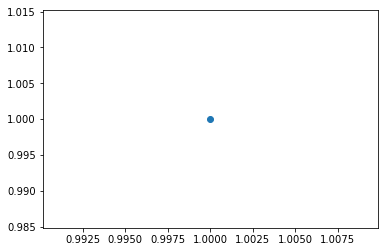

In [7]:
# Пример 1.4.1

import matplotlib.pyplot as plt

fig = plt.figure()   # Создание объекта Figure
print (fig.axes)   # Список текущих областей рисования пуст
print (type(fig))   # тип объекта Figure
plt.scatter(1.0, 1.0)   # scatter - метод для нанесения маркера в точке (1.0, 1.0)

# После нанесения графического элемента в виде маркера
# список текущих областей состоит из одной области
print (fig.axes)

# смотри преамбулу
save(name='pic_1_4_1', fmt='pdf')
save(name='pic_1_4_1', fmt='png')

plt.show()

Обычно рисунок в matplotlib представляет собой прямоугольную область, заданную в относительных координатах: от 0 до 1 включительно по обеим осям. Второй распространённый вариант типа рисунка - круглая область (polar plot). Подробнее о таких типах графиков [смотри главу "Графики в полярных координатах"](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3%20Chapter%2011%20Polar%20plots.ipynb).

Чтобы сохранить получившийся рисунок нужно воспользоваться методом `plt.savefig()`. Он сохраняет текущую конфигурацию текущего рисунка в графический файл с некоторым расширением (png, jpeg, pdf и др.), который можно задать через параметр fmt. Поэтому её нужно вызывать в конце исходного кода, после всех вызова всех других команд. Если в python-скрипте создать несколько рисунков figure и попытаться сохранить их одной командой `plt.savefig()`, то будет сохранён последний рисунок figure.

<class 'matplotlib.axes._axes.Axes'>


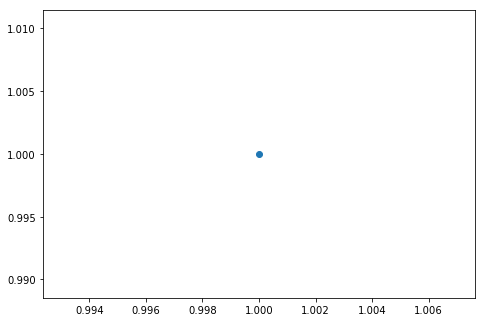

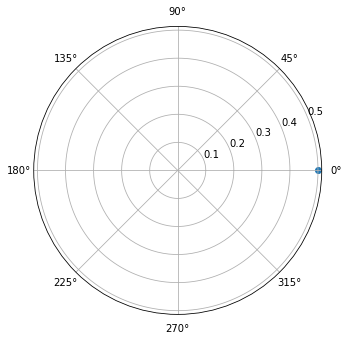

In [8]:
# Пример 1.4.2 Различные по форме области рисования

import matplotlib.pyplot as plt

fig = plt.figure()
# Добавление на рисунок прямоугольной (по умолчанию) области рисования
ax = fig.add_axes([0, 0, 1, 1])
print (type(ax))
plt.scatter(1.0, 1.0)
plt.savefig('example 142a.png', fmt='png')


fig = plt.figure()
# Добавление на рисунок круговой области рисования
ax = fig.add_axes([0, 0, 1, 1], polar=True)
plt.scatter(0.0, 0.5)
plt.savefig('example 142b.png', fmt='png')

# смотри преамбулу
save('pic_1_4_2', fmt='pdf')
save('pic_1_4_2', fmt='png')

plt.show()

### 1.5 Элементы рисунка Artists

Всё пространство рисунка Figure (прямоугольной или иной формы) можно использовать для нанесения других элементов рисунка, например, контейнеров Axes, графических примитивов в виде линий, фигур, текста и так далее. В любом случае каждый рисунок можно структурно представить следующим образом:

1. Область рисования Axes
    + Заголовок области рисования -> `plt.title()`;

2. Ось абсцисс Xaxis 
    + Подпись оси абсцисс OX -> `plt.xlabel()`;

3. Ось абсцисс Yaxis 
    + Подпись оси абсцисс OY -> `plt.ylabel()`;

4. Легенда -> `plt.legend()`

5. Цветовая шкала -> `plt.colorbar()`
    + Подпись горизонтальной оси абсцисс OY -> `cbar.ax.set_xlabel()`;
    
    + Подпись вертикальной оси абсцисс OY -> `cbar.ax.set_ylabel()`;

7. Деления на оси абсцисс OX -> `plt.xticks()`

8. Деления на оси ординат OY -> `plt.yticks()`

Для каждого из перечисленных уровней-контейнеров есть возможность нанести заголовок (title) или подпись (label). Подписи к рисунку облегчают понимание того, в каких единицах представлены данные на графике или диаграмме.

Также часто на рисунок наносятся линии вспомогательной сетки (grid). В pyplot она вызывается командой `plt.grid()`. Вспомогательная сетка связана с делениями координатных осей (ticks), которые определяются автоматически исходя из значений выборки. В дальнейшем будет показано как определять положение и задавать значения делений на координатных осях. Стоит сказать, что в matplotlib существуют главные деления (major ticks) и вспомогательные (minor ticks) для каждой координатной оси. По умолчанию рисуются только главные делений и связанные с ними линии сетки grid. В плане настройки главные деления ничем не отличаются от вспомогательных.

Если на рисунке присутствует так называемый "mappable object", то на рисунке может быть нарисована цветовая шкала (colorbar). К шкале также можно делать подписи вдоль разных сторон. При этом сама цветовая может быть расположена как на текущей области рисования axes, отбирая у неё некоторую долю, либо может быть размещена на самостоятельной области рисования. Подробнее о цветовой шкале [в главе "Цветовая шкала"](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3%20Chapter%2013%20Colorbar.ipynb).

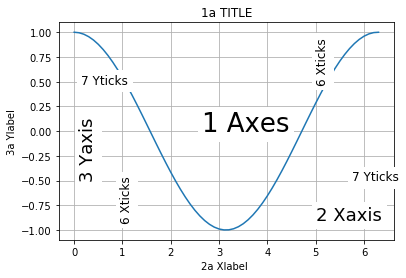

In [17]:
# Пример 1.5.1 
# Элементы простого рисунка 

import matplotlib.pyplot as plt
import numpy as np

lag = 0.1
x = np.arange(0.0, 2*np.pi+lag, lag)
y = np.cos(x)

fig = plt.figure()
plt.plot(x, y)

plt.text(np.pi-0.5, 0,  '1 Axes', fontsize=26, bbox=dict(edgecolor='w', color='w'))
plt.text(0.1, 0, '3 Yaxis', fontsize=18, bbox=dict(edgecolor='w', color='w'), rotation=90)
plt.text(5, -0.9, '2 Xaxis', fontsize=18, bbox=dict(edgecolor='w', color='w'))

plt.title('1a TITLE')
plt.ylabel('3a Ylabel')
plt.xlabel('2a Xlabel ')

plt.text(5, 0.85, '6 Xticks', fontsize=12, bbox=dict(edgecolor='w', color='w'), rotation=90)
plt.text(0.95, -0.55, '6 Xticks', fontsize=12, bbox=dict(edgecolor='w', color='w'), rotation=90)

plt.text(5.75, -0.5, '7 Yticks', fontsize=12, bbox=dict(edgecolor='w', color='w'))
plt.text(0.15, 0.475, '7 Yticks', fontsize=12, bbox=dict(edgecolor='w', color='w'))

plt.grid(True)

# смотри преамбулу
save('pic_1_5_1', fmt='pdf')
save('pic_1_5_1', fmt='png')

plt.show()

In [ ]:
# Пример 1.5.2 
# Элементы более сложного рисунка

import matplotlib.pyplot as plt
import numpy as np

N = 100
n = np.sqrt(N)
x = np.arange(n)
# Задаём выборку из Гамма-распредления с параметрами формы=1. и масштаба=0.
z = np.random.random(N).reshape(n, n)
y = z[5,:]

fig = plt.figure()
cc = plt.contourf(z, alpha=0.5)   # трёхмерное поле
plt.plot(x, y, label='line', color='red') # красная линия

plt.title('1a. Title')   # заголовок
plt.xlabel('2a. Xlabel')   # подпись оси OX
plt.ylabel('3a. Ylabel')   # подпись оси OY
plt.legend()   # легенда
cbar = plt.colorbar(cc)   # цветовая шкала

plt.text(2.5, 7, '1. Axes', fontsize=26, bbox=dict(edgecolor='w', color='w'))
plt.text(4, -0.5, '2. XAxis', fontsize=18, bbox=dict(edgecolor='w', color='w'))
plt.text(-0.5, 3.8, '3. YAxis', fontsize=18, bbox=dict(edgecolor='w', color='w'), rotation=90)
plt.text(6.3, 7.2, '4. Legend', fontsize=16, bbox=dict(edgecolor='w', color='w'))
plt.text(9.1, 5., '5. Colorbar', fontsize=16, bbox=dict(edgecolor='w', color='w'), rotation=90)
plt.text(7., 0.8, '6. Xticks', fontsize=12, bbox=dict(edgecolor='w', color='w'))
plt.text(0.8, 8.4, '7. Yticks', fontsize=12, bbox=dict(edgecolor='w', color='w'), rotation=90)

# Подписи для цветовых шкал имеют отличный от остальных подписей синтаксис
cbar.ax.set_xlabel('5a. Colorbar Xlabel', color='k', rotation=30)
cbar.ax.set_ylabel('5b. Colorbar Ylabel', color='k')

plt.text(2.8, 4.8,'6. Grid lines', fontsize=14)
plt.grid(True)

# смотри преамбулу
save('pic_1_5_2', fmt='pdf')
save('pic_1_5_2', fmt='png')

plt.show()

### 1.6 Свойства графических элементов
 
Многообразие и удобство создания графики в matplotlib обеспечивается не только за счёт созданных графических команд, но и за счёт богатого арсенала по конфигурации типовых форм. Эта настройка включает в себя работу с цветом, формой, типом линии или маркера, толщиной линий, степенью прозрачности элементов, размером и типом шрифта и другими свойствами.

Параметры, которые определяют эти свойства в различных графических командах, обычно имеют одинаковый синтаксис, то есть называются одинаково. Стандартным способом задания свойств какого либо создаваемого объекта (или методу) является передача по ключу: ключ=значение. Наиболее часто встречаемые названия параметров изменения свойств графических объектов перечислены ниже:

+ *color/colors/c* - цвет;

+ *linewidth/linewidths* - толщина линии;

+ *linestyle* - тип линии;

+ *alpha* - степень прозрачности (от полностью прозрачного 0 до непрозрачного 1);

+ *fontsize* - размер шрифта;

+ *marker* - тип маркера;

+ *s* - размер маркера в методе plt.scatter(только цифры);

+ *rotation* - поворот строки на X градусов.

При создании функций или методов классов, особенно в случае наследования (см. Приложение 1), параметры часто передают в виде объединений последовательностей: кортежа или словаря. Для этого существуют специальные символы-приставки: "\*" или "\**" соответственно. Это особенно полезно в случаях, когда функция/метод может принимать переменное число параметров.

Принято, что для передачи кортежа используется переменная **args**, а в случае со словарём - **kwargs**. Если перед переменной args указан символ "\*", то все дополнительные аргументы, переданные функции/методу, сохранятся в
args в виде кортежа. Если перед args будет указан символ "\**", то все дополнительные параметры будут рассматриваться как пары "ключ - значение" в словаре.

В функциях/методах описывающие свойства таких графических объектов как линия, текст, прямоугольник, параметры часто объединяют в виде последовательностей \*args, либо словарей \*\*kwargs. Так удобнее при создании классов и их методов (смотри пример 1.6.1). 

Если в описании графического метода указано примерно так, как в,

> plt.plot(\*args, \*\*kwargs)

то это значит, что в качестве входных данных требуется сначала список/кортеж параметров(чаще всего нужна хотя бы одна последовательность типа значений функции Y), а после этого можно передавать значения параметров по ключевым именам этих параметров (color, linewidth и т.д.).

Словарь kwargs ДО вызова метода pop: {'wookie': 'green', 'solo': 1, 'friend': True}
Словарь kwargs ПОСЛЕ вызова метода pop: {'friend': True}
('res1', <type 'list'>, [45, 10.895519422104705, -416.25])
('res2', <type 'str'>, '1 loves green')


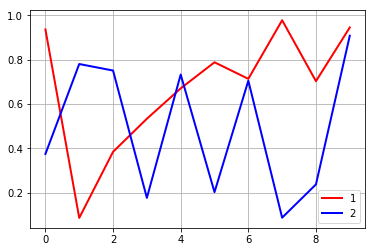

In [18]:
# Пример 1.6.1

import numpy as np

# Пример функции с объединением в кортеж *args
def f_sums(*args):

    list1 = []
    for arg in args:
        a = 0
        for i in arg:
            a += i
        list1.append(a)

    return list1

# Пример функции с объединением в словарь **kwargs
def f_words(**kwargs):
    '''
    Функция pop возвращает значение для заданного ключа (если он есть в словаре)
    и удаляет из словаря пару "ключ - значение"
    '''
    
    print 'Словарь kwargs ДО вызова метода pop:', kwargs    
    per1 = kwargs.pop('solo', 'Han')
    per2 = kwargs.pop('wookie', 'Chubbaca')
    act = kwargs.pop('loves', 'loves')
    str1 = '%s %s %s' % (per1, act, per2)
    print 'Словарь kwargs ПОСЛЕ вызова метода pop:', kwargs
    
    return str1

# Пример функции с объединением и в кортеж args и в словарь **kwargs
def f_plot(*args, **kwargs):

    xlist = []
    ylist = []
    for i, arg in enumerate(args):
        if(i % 2 == 0):
            xlist.append(arg)
        else:
            ylist.append(arg) 
    
    colors = kwargs.pop('colors', 'k')
    linewidth = kwargs.pop('linewidth', 1.)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    i = 0
    for x, y, color in zip(xlist, ylist, colors):
        i += 1
        ax.plot(x, y, color=color, linewidth=linewidth, label=str(i))
    
    ax.grid(True)
    ax.legend()
    save('ex_1_6_1', fmt='pdf')
    save('ex_1_6_1', fmt='png')

# ==================================
# MAIN SCRIPT BODY

x = np.arange(10)
y = np.random.random(20)
z = np.linspace(-15, -7.5, 37)
xyz = [x, y, z]

abc = {'solo': 1, 'wookie': 'green', 'friend': True}

res1 = f_sums(*xyz)
res2 = f_words(**abc)

print ('res1', type(res1), res1)
print ('res2', type(res2), res2)

"""
Т.к. в plt.plot нет обязательных параметров, то переданные 
в эту функцию через зпт последовательности или массивы будут обработаны
Здесь пример передачи двух линий - две последовательности из пары OX-OY
(x, y2) и (x, y3). Им в соответствие представлена последовательность цветов
colors.
"""
colors = ['red', 'blue']
N = 10
x = np.arange(N)
y2 = np.random.random(N)
y3 = np.random.random(N)

f_plot(x, y2, x , y3, colors=colors, linewidth=2.)

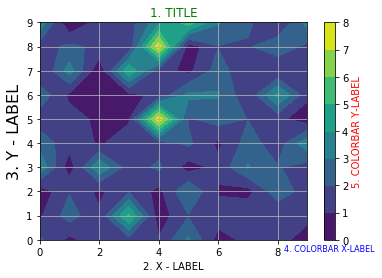

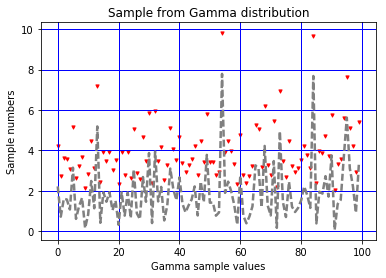

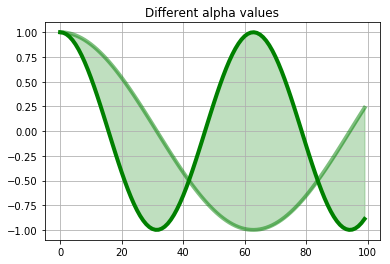

In [14]:
# Пример 1.6.2 Свойства графических элементов

import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.arange(N)
# Задаём выборку из Гамма-распредления с параметрами формы=1. и масштаба=0.
z = np.random.gamma(2., 1., N)
z1 = np.cos(x/10.)
z2 = np.cos(x/20.)

y = z.reshape(10,10)
#y = np.cos(y)

fig = plt.figure()
cc = plt.contourf(y) 
cbar = plt.colorbar(cc)

plt.title('1. TITLE', color='green')
plt.xlabel('2. X - LABEL')
plt.ylabel('3. Y - LABEL', fontsize=16)

# Подписи для цветовых шкал имеют отличный от остальных подписей синтаксис
cbar.ax.set_xlabel('4. COLORBAR X-LABEL', color='b')
cbar.ax.set_ylabel('5. COLORBAR Y-LABEL', color='r')
plt.grid(True)

fig = plt.figure()

my_dict = {'color' : 'grey', 'linewidth' : 2.5, 'linestyle' : '--'}
xz = [x, z]

# передача параметров через список xz и словарь my_dict. Наличие знаков * и ** обязательно!
cc = plt.plot(*xz, **my_dict) 
# результат аналогичен такой записи
#cc = plt.plot(x, z, color='grey', linewidth=2.5, linestyle='--')

plt.scatter(x, y + 2.0, marker='v', s=10, color='red')

plt.title('Sample from Gamma distribution')
plt.xlabel('Gamma sample values')
plt.ylabel('Sample numbers')

# Подписи для цветовых шкал имеют отличный от остальных подписей синтаксис
cbar.ax.set_xlabel('4. COLORBAR X-LABEL', fontsize=8)
cbar.ax.set_ylabel('5. COLORBAR Y-LABEL', color='r')
plt.grid(True, color='blue', linewidth=1.0)

fig = plt.figure()

# создание словаря
my_dict = {'color' : 'green', 'linewidth' : 4.0, 'alpha' : 0.5} 

plt.fill_between(x, z2, z1, color='green', alpha=0.25) 
plt.plot(x, z1, color='green', linewidth=4.0)
plt.plot(x, z2, **my_dict)
plt.title('Different alpha values')
plt.grid(True)

# смотри преамбулу
save('pic_1_6_2', fmt='pdf')
save('pic_1_6_2', fmt='png')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

+ [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)